## Imports

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Carregamento

In [7]:
path_comercio = '../Dados/tech-challenge/content/Comercio.csv'

df_comercio = pd.read_csv(path_comercio, sep=';')
df_comercio.head()

# Os dados tem a mesma estrutura das tabelas de processamento por isso
# faremos a leitura com as colunas da outra tabela

,1,VINHO DE MESA,VINHO DE MESA.1,98327606,114399031,118377367,116617910,94173324,108031792,139238614,...,206969571,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238
0,2,vm_Tinto,Tinto,83300735,98522869,101167932,98196747,77167303,91528090,116407222,...,173964776,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678
1,3,vm_Rosado,Rosado,107681,542274,7770851,8425617,8891367,7261777,11748047,...,1738134,1777648,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606
2,4,vm_Branco,Branco,14919190,15333888,9438584,9995546,8114654,9241925,11083345,...,31266661,31779668,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954
3,5,VINHO FINO DE MESA,VINHO FINO DE MESA,4430629,4840369,5602091,7202830,7571802,8848303,14095648,...,22469950,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445
4,6,vm_Tinto,Tinto,435354,428927,624499,783508,1616144,2050960,4450570,...,15443016,19121750,15354938,15572632,15228514,12021684,11150517,11433702,18202453,19337862


In [9]:
path_processa_mesa = '../Dados/tech-challenge/content/ProcessaMesa.csv'

df_processa_mesa = pd.read_csv(path_processa_mesa, sep=';')
columns = df_processa_mesa.columns

# Re-leitura da tabela de comercio
df_comercio = pd.read_csv(path_comercio, sep=';', names=columns)
df_comercio.head()

,id,control,cultivar,1970,1971,1972,1973,1974,1975,1976,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,VINHO DE MESA,VINHO DE MESA,98327606,114399031,118377367,116617910,94173324,108031792,139238614,...,206969571,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238
1,2,vm_Tinto,Tinto,83300735,98522869,101167932,98196747,77167303,91528090,116407222,...,173964776,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678
2,3,vm_Rosado,Rosado,107681,542274,7770851,8425617,8891367,7261777,11748047,...,1738134,1777648,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606
3,4,vm_Branco,Branco,14919190,15333888,9438584,9995546,8114654,9241925,11083345,...,31266661,31779668,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954
4,5,VINHO FINO DE MESA,VINHO FINO DE MESA,4430629,4840369,5602091,7202830,7571802,8848303,14095648,...,22469950,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445


In [10]:
# Leitura da tabela de produção
path_producao = '../Dados/tech-challenge/content/Producao.csv'

df_producao = pd.read_csv(path_comercio, sep=';', names=columns)
df_producao.head()

,id,control,cultivar,1970,1971,1972,1973,1974,1975,1976,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,1,VINHO DE MESA,VINHO DE MESA,98327606,114399031,118377367,116617910,94173324,108031792,139238614,...,206969571,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238
1,2,vm_Tinto,Tinto,83300735,98522869,101167932,98196747,77167303,91528090,116407222,...,173964776,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678
2,3,vm_Rosado,Rosado,107681,542274,7770851,8425617,8891367,7261777,11748047,...,1738134,1777648,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606
3,4,vm_Branco,Branco,14919190,15333888,9438584,9995546,8114654,9241925,11083345,...,31266661,31779668,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954
4,5,VINHO FINO DE MESA,VINHO FINO DE MESA,4430629,4840369,5602091,7202830,7571802,8848303,14095648,...,22469950,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445


## Análise - Comércio

In [11]:
# Filtrando periodo dos últimos 15 anos
filtro_colunas = ['control', 'cultivar','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']

df_comercio = df_comercio[filtro_colunas]
df_comercio.head()

,control,cultivar,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,VINHO DE MESA,VINHO DE MESA,226710045,200488612,234525979,221242945,230310468,206969571,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238
1,vm_Tinto,Tinto,190526781,172020779,193004182,188649074,196562722,173964776,188033494,178250072,182028785,146646365,154309442,155115499,158519218,189573423,185653678
2,vm_Rosado,Rosado,2252558,1840779,2307580,2036928,1668823,1738134,1777648,1419855,1409002,1391942,1097426,1972944,1265435,1394901,1931606
3,vm_Branco,Branco,29122090,26627054,39214217,30556943,32078923,31266661,31779668,26734500,25760681,18731315,20653091,20097830,20661836,24589607,22426954
4,VINHO FINO DE MESA,VINHO FINO DE MESA,21485699,23167738,33080270,21390159,19967310,22469950,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445


In [14]:
# Agrupando dados dos grupos

# df_vm = df_comercio[df_comercio['control'] == 'VINHO DE MESA']
# df_vfm = df_comercio[df_comercio['control'] == 'VINHO FINO DE MESA (VINÍFERA)']
# df_suco_prod = df_comercio[df_comercio['control'] == 'SUCO']
# df_derivados_prod = df_comercio[df_comercio['control'] == 'DERIVADOS']

df_comercio_by_grupo = df_comercio.iloc[[0,4,8,9,10,14,18,23,24]]
df_comercio_by_grupo.head(15)

,control,cultivar,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,VINHO DE MESA,VINHO DE MESA,226710045,200488612,234525979,221242945,230310468,206969571,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238
4,VINHO FINO DE MESA,VINHO FINO DE MESA,21485699,23167738,33080270,21390159,19967310,22469950,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445
8,VINHO FRIZANTE,VINHO FRIZANTE,250114,441691,1003596,1851136,1706679,1605767,1764851,1893469,1836167,1727386,1586985,1638337,1826433,2557585,3696762
9,VINHO ORGÂNICO,VINHO ORGÂNICO,0,0,0,0,0,0,0,0,0,0,0,0,2554,10718,18686
10,VINHO ESPECIAL,VINHO ESPECIAL,106333,65,113,293,699,239,2257,7231,593,331,0,0,0,0,0
14,ESPUMANTES,ESPUMANTES,8596406,9539610,11242890,12647906,13305275,14889147,15978504,17191075,18897144,16945710,17583283,18218375,22759859,22610762,31242697
18,SUCO DE UVAS,SUCO DE UVAS,18514411,21568032,29131455,35164681,45222136,53832204,75973297,88013377,115288072,92290851,107243326,140472108,147907617,144889668,147753321
23,SUCO DE UVAS CONCENTRADO,SUCO DE UVAS CONCENTRADO,25603588,27880465,31861857,30827991,34892316,33529324,38369914,39359935,34923477,28859784,26815645,23572263,28721470,22422414,26730942
24,OUTROS PRODUTOS COMERCIALIZADOS,OUTROS PRODUTOS COMERCIALIZADOS,27833872,28697650,26554757,29023870,28783827,30316511,36841561,34963296,31922948,27120309,28027052,31246158,34794651,26547242,26657930


In [49]:
# Modificando o index do DataFrame
df_comercio_by_grupo.reset_index(inplace=True)
del df_comercio_by_grupo['index']

RangeIndex(start=0, stop=9, step=1)

In [52]:
df_comercio_by_grupo

,control,cultivar,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,VINHO DE MESA,VINHO DE MESA,226710045,200488612,234525979,221242945,230310468,206969571,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238
1,VINHO FINO DE MESA,VINHO FINO DE MESA,21485699,23167738,33080270,21390159,19967310,22469950,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445
2,VINHO FRIZANTE,VINHO FRIZANTE,250114,441691,1003596,1851136,1706679,1605767,1764851,1893469,1836167,1727386,1586985,1638337,1826433,2557585,3696762
3,VINHO ORGÂNICO,VINHO ORGÂNICO,0,0,0,0,0,0,0,0,0,0,0,0,2554,10718,18686
4,VINHO ESPECIAL,VINHO ESPECIAL,106333,65,113,293,699,239,2257,7231,593,331,0,0,0,0,0
5,ESPUMANTES,ESPUMANTES,8596406,9539610,11242890,12647906,13305275,14889147,15978504,17191075,18897144,16945710,17583283,18218375,22759859,22610762,31242697
6,SUCO DE UVAS,SUCO DE UVAS,18514411,21568032,29131455,35164681,45222136,53832204,75973297,88013377,115288072,92290851,107243326,140472108,147907617,144889668,147753321
7,SUCO DE UVAS CONCENTRADO,SUCO DE UVAS CONCENTRADO,25603588,27880465,31861857,30827991,34892316,33529324,38369914,39359935,34923477,28859784,26815645,23572263,28721470,22422414,26730942
8,OUTROS PRODUTOS COMERCIALIZADOS,OUTROS PRODUTOS COMERCIALIZADOS,27833872,28697650,26554757,29023870,28783827,30316511,36841561,34963296,31922948,27120309,28027052,31246158,34794651,26547242,26657930


In [63]:
# Gerando DataFrame com o periodo consolidado por grupo
df_comercio_litros_by_grupo = {
    "grupo": [],
    "litros_produzidos": []
}
# df_comercio_by_grupo['cultivar'][0]
# df_comercio_by_grupo.iloc[0].values[2:].sum()
for i, item in enumerate(df_comercio_by_grupo['cultivar'].to_list()):
    df_comercio_litros_by_grupo["grupo"].append(item)
    df_comercio_litros_by_grupo["litros_produzidos"].append(df_comercio_by_grupo.iloc[i].values[2:].sum())

In [64]:
df_comercio_litros_by_grupo = pd.DataFrame(df_comercio_litros_by_grupo)
df_comercio_litros_by_grupo

,grupo,litros_produzidos
0,VINHO DE MESA,3083473837
1,VINHO FINO DE MESA,327447196
2,VINHO FRIZANTE,25386958
3,VINHO ORGÂNICO,31958
4,VINHO ESPECIAL,118154
5,ESPUMANTES,251648643
6,SUCO DE UVAS,1263264556
7,SUCO DE UVAS CONCENTRADO,454371385
8,OUTROS PRODUTOS COMERCIALIZADOS,449331634


In [66]:
# Transformando o grupo em index
df_comercio_litros_by_grupo.index = df_comercio_litros_by_grupo['grupo']
df_comercio_litros_by_grupo.index 

Index(['VINHO DE MESA', 'VINHO  FINO DE MESA', 'VINHO FRIZANTE',
       'VINHO ORGÂNICO', 'VINHO ESPECIAL', 'ESPUMANTES ', 'SUCO DE UVAS',
       'SUCO DE UVAS CONCENTRADO', 'OUTROS PRODUTOS COMERCIALIZADOS'],
      dtype='object', name='grupo')

In [176]:
# Reduzindo a notação dos valores trabalhados
df_comercio_litros_by_grupo['litros_produzidos'] = df_comercio_litros_by_grupo['litros_produzidos'] / 1_000_000

In [178]:
df_comercio_litros_by_grupo.head()

,grupo,litros_produzidos
grupo,,
VINHO DE MESA,VINHO DE MESA,3083.473837
VINHO FINO DE MESA,VINHO FINO DE MESA,327.447196
VINHO FRIZANTE,VINHO FRIZANTE,25.386958
VINHO ORGÂNICO,VINHO ORGÂNICO,0.031958
VINHO ESPECIAL,VINHO ESPECIAL,0.118154


<Axes: xlabel='grupo'>

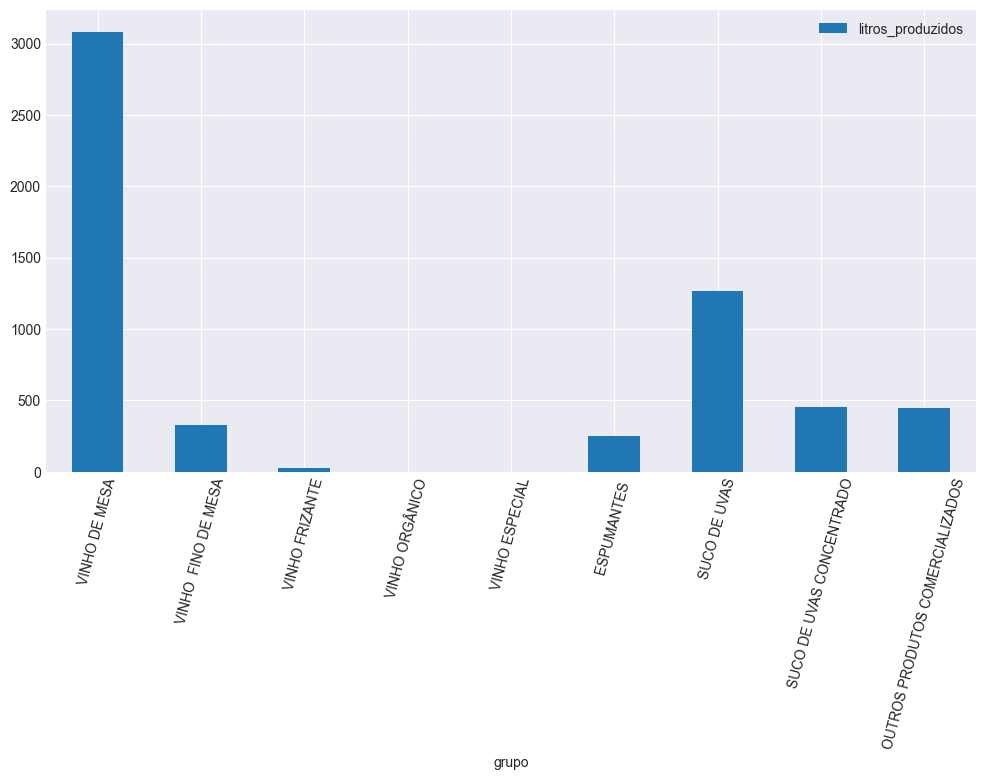

In [177]:
# Objetivo é procurar o produto que no total trouxe a maior comercialização
# Gerando gráfico de barras
df_comercio_litros_by_grupo.plot(kind='bar',  rot=75, figsize=(12,6))

# Melhorias a serem feitas -> Legenda, eixo Y, eixo x mudar de lado o nome dos itens,
#    alterar de cor para cada grupo, anexar titulo do gráfico

# Problemas -> Indice 3, 4 pelo gráfico parece, que não houve venda 

In [180]:
# Reduzindo os valores 
for coluna in df_comercio_by_grupo.columns[2:]:
    df_comercio_by_grupo[coluna] = df_comercio_by_grupo[coluna] / 1_000_000

C:\Users\User\AppData\Local\Temp\ipykernel_14776\2269882970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comercio_by_grupo[coluna] = df_comercio_by_grupo[coluna] / 1_000_000


C:\Users\User\AppData\Local\Temp\ipykernel_14776\3588395339.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


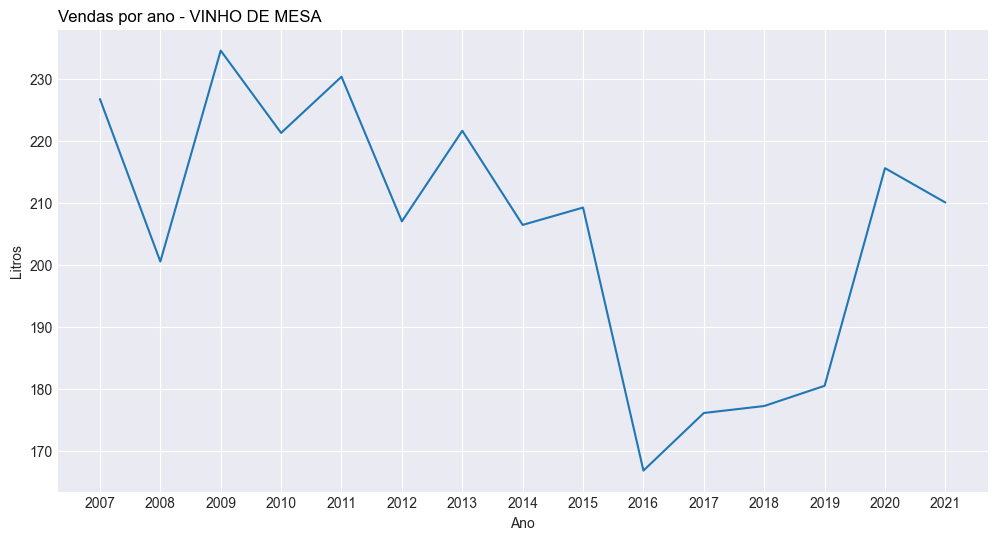

In [181]:
# Objetivo é mostrar como foram as vendas de VINHO DE MESA durante os últimos 15 anos
# E identificar quais os periodos que houveram baixas 

plt.style.use('seaborn-darkgrid')
 
plt.figure(figsize=[12.0,6])  
plt.plot(df_comercio_by_grupo.iloc[0][2:])

plt.title("Vendas por ano - VINHO DE MESA", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Ano")
plt.ylabel("Litros")
plt.show()

# Problemas -> Arrumar a escala do 

In [148]:
# Alterando o index da tabela
df_comercio_by_grupo.index = df_comercio_by_grupo['cultivar']
df_comercio_by_grupo.index

<Axes: >

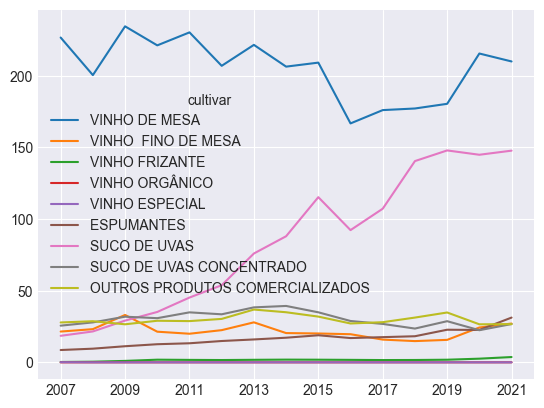

In [183]:
df_comercio_by_grupo.T[2:].plot()

In [161]:
df_comercio_by_grupo.iloc[:, 2:]

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
cultivar,,,,,,,,,,,,,,,
VINHO DE MESA,226710045,200488612,234525979,221242945,230310468,206969571,221590810,206404427,209198468,166769622,176059959,177186273,180446489,215557931,210012238
VINHO FINO DE MESA,21485699,23167738,33080270,21390159,19967310,22469950,27912934,20424983,20141631,19630158,15874354,14826143,15684588,24310834,27080445
VINHO FRIZANTE,250114,441691,1003596,1851136,1706679,1605767,1764851,1893469,1836167,1727386,1586985,1638337,1826433,2557585,3696762
VINHO ORGÂNICO,0,0,0,0,0,0,0,0,0,0,0,0,2554,10718,18686
VINHO ESPECIAL,106333,65,113,293,699,239,2257,7231,593,331,0,0,0,0,0
ESPUMANTES,8596406,9539610,11242890,12647906,13305275,14889147,15978504,17191075,18897144,16945710,17583283,18218375,22759859,22610762,31242697
SUCO DE UVAS,18514411,21568032,29131455,35164681,45222136,53832204,75973297,88013377,115288072,92290851,107243326,140472108,147907617,144889668,147753321
SUCO DE UVAS CONCENTRADO,25603588,27880465,31861857,30827991,34892316,33529324,38369914,39359935,34923477,28859784,26815645,23572263,28721470,22422414,26730942
OUTROS PRODUTOS COMERCIALIZADOS,27833872,28697650,26554757,29023870,28783827,30316511,36841561,34963296,31922948,27120309,28027052,31246158,34794651,26547242,26657930


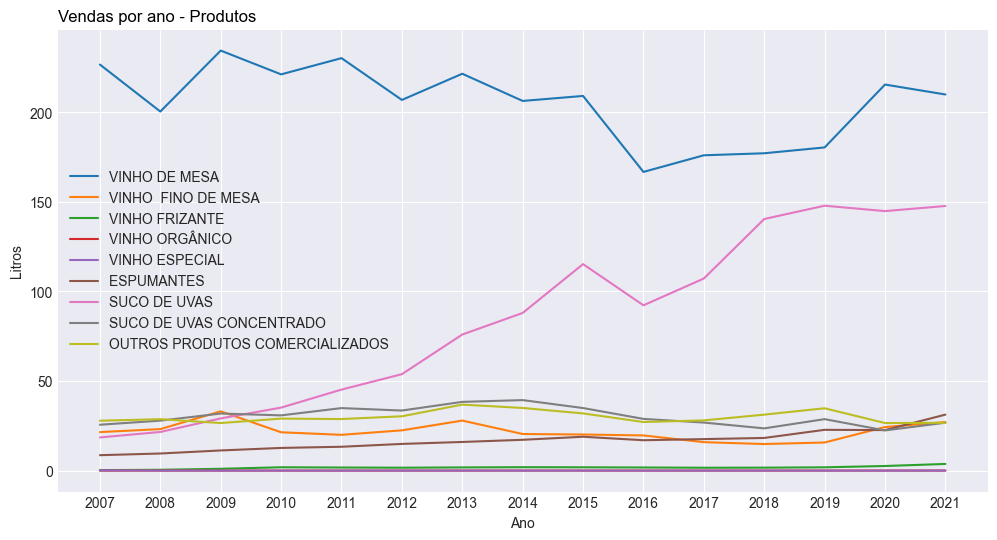

In [184]:
# Mostrar qual foi o comparativo para os outros grupos também e validar qual foi o melhor ano de venda em todos os aspectos
# O maior salto de comercialização apenas de validar no gráfico foi o de suco de uva, em quase todo o periodo houve ascensão


plt.figure(figsize=[12.0,6])  

plt.plot(df_comercio_by_grupo.T[2:], label=df_comercio_by_grupo.index)

plt.title("Vendas por ano - Produtos", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Ano")
plt.ylabel("Litros")
plt.legend()

plt.show()


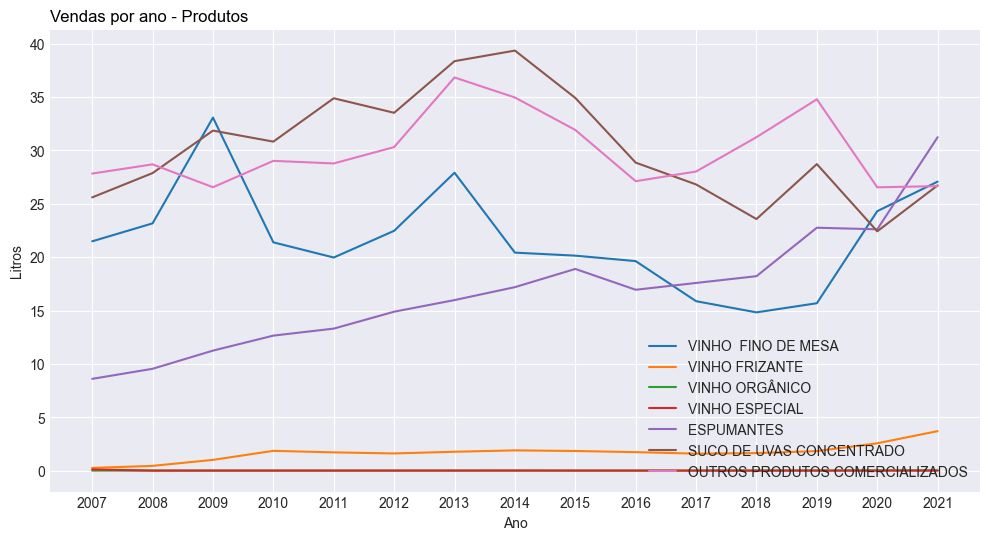

In [227]:
# Removendo os dois maiores valores da analise -> VINHO DE MESA E SUCOS DE UVA

# Criação do filtro
filtro_comercio_grupos = df_comercio_by_grupo.index

filtro_comercio_grupos = filtro_comercio_grupos.delete(0)
filtro_comercio_grupos = filtro_comercio_grupos.delete(5)
# filtro_comercio_grupos = filtro_comercio_grupos.to_list()
# filtro_comercio_grupos.pop(0)
# filtro_comercio_grupos.pop(5)
filtro_comercio_grupos

df_comercio_filtro = df_comercio_by_grupo.T[filtro_comercio_grupos][2:]

# Plotando o gráfico
plt.figure(figsize=[12.0,6])  

plt.plot(df_comercio_filtro, label=df_comercio_filtro.T.index)

plt.title("Vendas por ano - Produtos", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Ano")
plt.ylabel("Litros")
# Ajustando a legenda -> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.legend(loc=4)

plt.show()


In [242]:
# Criação dos Grupos

# vm -> VINHO DE MESA / ve -> VINHO ESPECIAL / es -> ESPUMANTES / su -> SUCO DE UVAS / ou OUTROS PRODUTOS COMERCIALIZADOS
for i, item in enumerate(df_comercio['control']):
    if item.startswith('vm'):
        df_comercio['grupo'][i] = 'VINHO DE MESA'
    elif item.startswith('ve'):
        df_comercio['grupo'][i] = 'VINHO ESPECIAL'
    elif item.startswith('es'):
        df_comercio['grupo'][i] = 'ESPUMANTES'
    elif item.startswith('su'):
        df_comercio['grupo'][i] = 'SUCO DE UVAS'
    elif item.startswith('ou'):
        df_comercio['grupo'][i] = 'OUTROS PRODUTOS COMERCIALIZADOS'
    else:
        df_comercio['grupo'][i] = item

C:\Users\User\AppData\Local\Temp\ipykernel_14776\2977127024.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comercio['grupo'][i] = item
C:\Users\User\AppData\Local\Temp\ipykernel_14776\2977127024.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comercio['grupo'][i] = 'VINHO DE MESA'
C:\Users\User\AppData\Local\Temp\ipykernel_14776\2977127024.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comercio['grupo'][i] = 'VI

In [255]:
# Criação dos Grupos -> Alteração dos casos que não definia o vinho de mesa fino
df_comercio['grupo'].iloc[[4,5,6,7]] ='VINHO FINO DE MESA'

C:\Users\User\AppData\Local\Temp\ipykernel_14776\2245321800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comercio['grupo'].iloc[[4,5,6,7]] ='VINHO FINO DE MESA'


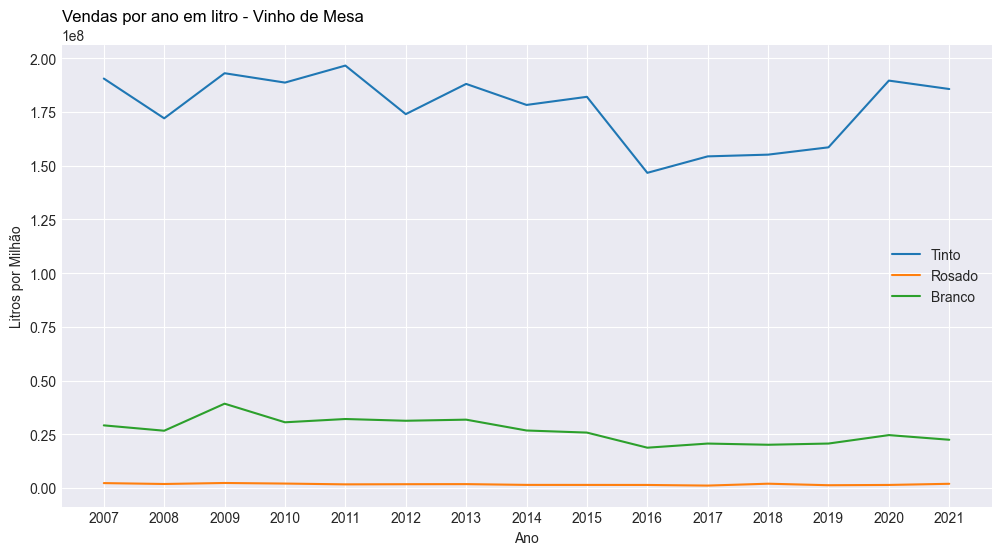

In [285]:
# Verifica qual tipo de vinho de mesa foi o mais comercializado 

df_grafico_comercio = df_comercio[(df_comercio['grupo'] == 'VINHO DE MESA') & (df_comercio['cultivar'] != 'VINHO DE MESA')].iloc[:,1:]
df_grafico_comercio.T[:-1]

plt.figure(figsize=[12.0,6])  
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(df_grafico_comercio.T[1:-1], label=['Tinto', 'Rosado', 'Branco'])

plt.title("Vendas por ano em litro - Vinho de Mesa", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Ano")
plt.ylabel("Litros por Milhão")
# Ajustando a legenda -> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.legend(loc=0)

plt.show()

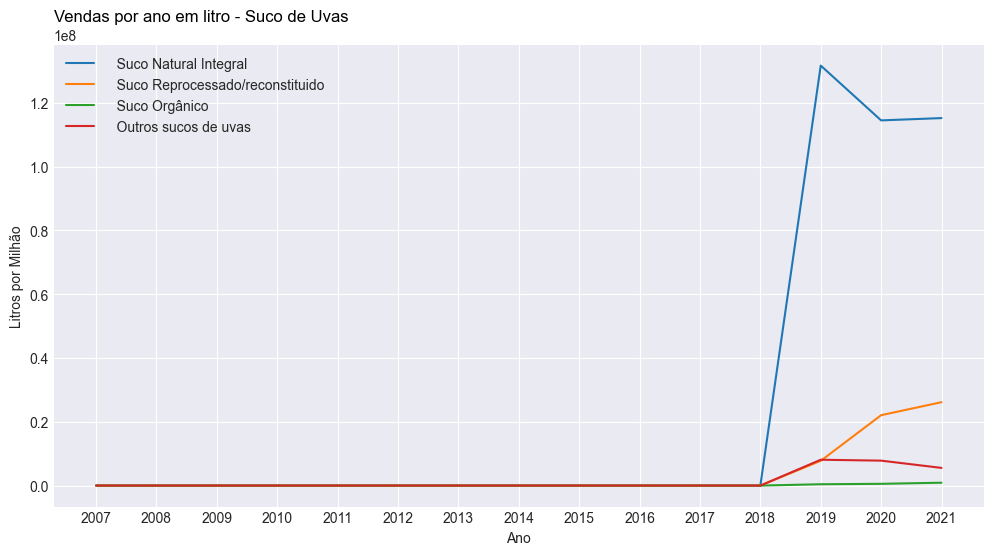

In [298]:
# Progresso da comercialização do suco de uva

df_grafico_comercio = df_comercio[(df_comercio['grupo'] == 'SUCO DE UVAS') & (df_comercio['cultivar'] != 'SUCO DE UVAS')].iloc[:,1:-1]
label_suco = df_grafico_comercio['cultivar'].to_list()

plt.figure(figsize=[12.0,6])  
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(df_grafico_comercio.T[1:], label=label_suco)

plt.title("Vendas por ano em litro - Suco de Uvas", loc='left', fontsize=12, fontweight=0, color='black')
plt.xlabel("Ano")
plt.ylabel("Litros por Milhão")
# Ajustando a legenda -> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.legend(loc=0)

plt.show()